<a href="https://colab.research.google.com/github/Egodz93/baitapweek3/blob/main/bai7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [ ]:
url = "https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')
print(chipo)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]  

### Step 4. See the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

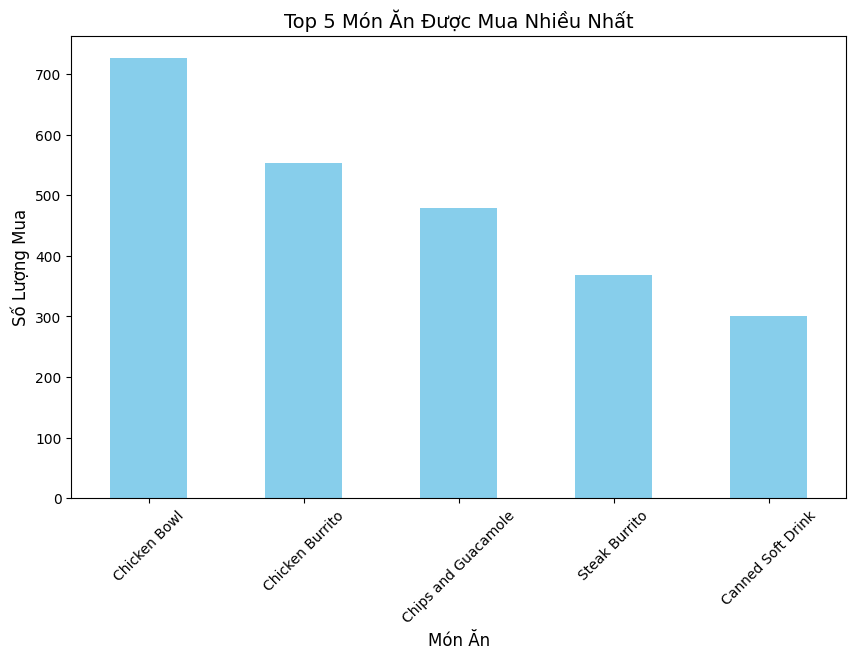

In [ ]:
# Tính số lượng mỗi món ăn được mua
top_items = chipo['item_name'].value_counts().head(5)

# Vẽ histogram
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top 5 Món Ăn Được Mua Nhiều Nhất', fontsize=14)
plt.xlabel('Món Ăn', fontsize=12)
plt.ylabel('Số Lượng Mua', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

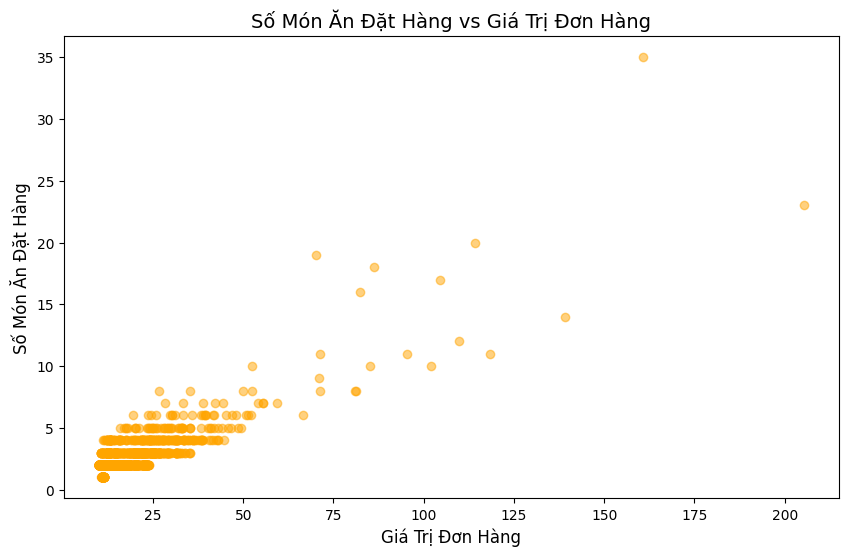

In [ ]:
# Tính số lượng món ăn trong mỗi đơn hàng
items_ordered = chipo.groupby('order_id')['quantity'].sum()

# Giá trị của đơn hàng (cột 'item_price' đã có dấu $ nên cần chuyển thành số)
chipo['item_price'] = chipo['item_price'].replace({'\\$': '', ',': ''}, regex=True).astype(float)

# Tính tổng giá trị mỗi đơn hàng
order_price = chipo.groupby('order_id')['item_price'].sum()

# Vẽ scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(order_price, items_ordered, alpha=0.5, color='orange')
plt.title('Số Món Ăn Đặt Hàng vs Giá Trị Đơn Hàng', fontsize=14)
plt.xlabel('Giá Trị Đơn Hàng', fontsize=12)
plt.ylabel('Số Món Ăn Đặt Hàng', fontsize=12)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.